Dataset: https://archive.ics.uci.edu/dataset/159/magic+gamma+telescope

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from imblearn.over_sampling import RandomOverSampler
import tensorflow as tf

In [2]:
cols = ['fLength', 'fWidth', 'fSize', 'fConc', 'fConc1', 'fAsym', 'fM3Long', 'fM3Trans', 'fAlpha', 'fDist', 'class']
df = pd.read_csv('data/magic+gamma+telescope/magic04.data', names=cols)
df.head() # show first 5 rows

fLength    fWidth   fSize   fConc  fConc1     fAsym  fM3Long  fM3Trans  \
0   28.7967   16.0021  2.6449  0.3918  0.1982   27.7004  22.0110   -8.2027   
1   31.6036   11.7235  2.5185  0.5303  0.3773   26.2722  23.8238   -9.9574   
2  162.0520  136.0310  4.0612  0.0374  0.0187  116.7410 -64.8580  -45.2160   
3   23.8172    9.5728  2.3385  0.6147  0.3922   27.2107  -6.4633   -7.1513   
4   75.1362   30.9205  3.1611  0.3168  0.1832   -5.5277  28.5525   21.8393   

    fAlpha     fDist class  
0  40.0920   81.8828     g  
1   6.3609  205.2610     g  
2  76.9600  256.7880     g  
3  10.4490  116.7370     g  
4   4.6480  356.4620     g

In [3]:
df["class"] = (df["class"] == "g").astype(int)

In [4]:
df.head()

fLength    fWidth   fSize   fConc  fConc1     fAsym  fM3Long  fM3Trans  \
0   28.7967   16.0021  2.6449  0.3918  0.1982   27.7004  22.0110   -8.2027   
1   31.6036   11.7235  2.5185  0.5303  0.3773   26.2722  23.8238   -9.9574   
2  162.0520  136.0310  4.0612  0.0374  0.0187  116.7410 -64.8580  -45.2160   
3   23.8172    9.5728  2.3385  0.6147  0.3922   27.2107  -6.4633   -7.1513   
4   75.1362   30.9205  3.1611  0.3168  0.1832   -5.5277  28.5525   21.8393   

    fAlpha     fDist  class  
0  40.0920   81.8828      1  
1   6.3609  205.2610      1  
2  76.9600  256.7880      1  
3  10.4490  116.7370      1  
4   4.6480  356.4620      1

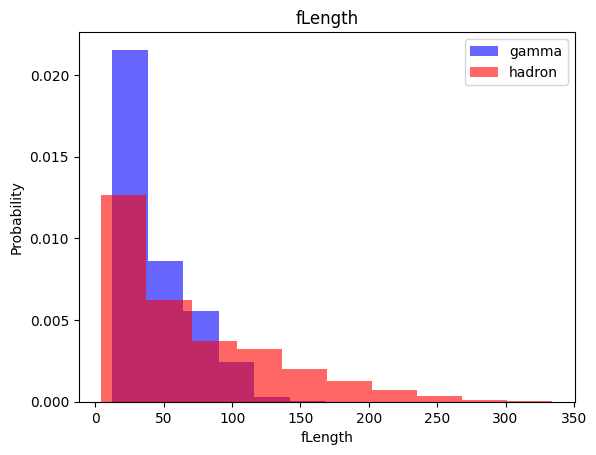

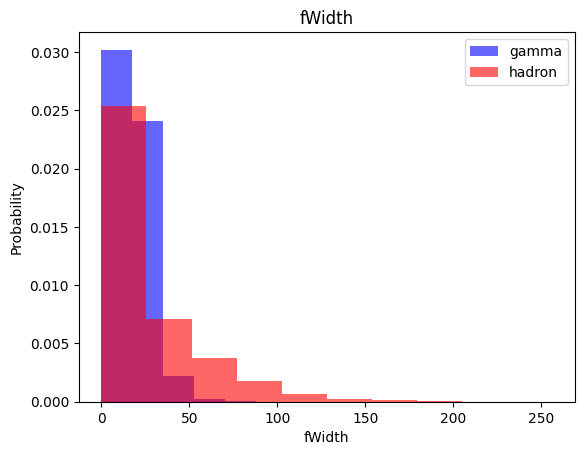

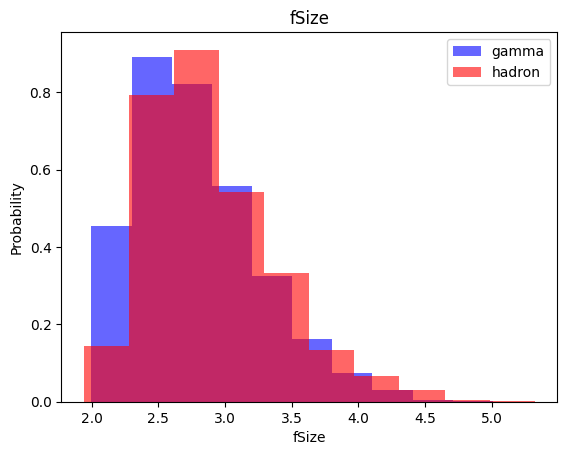

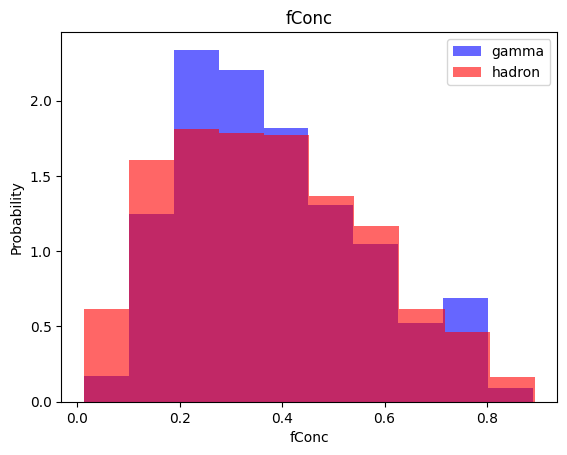

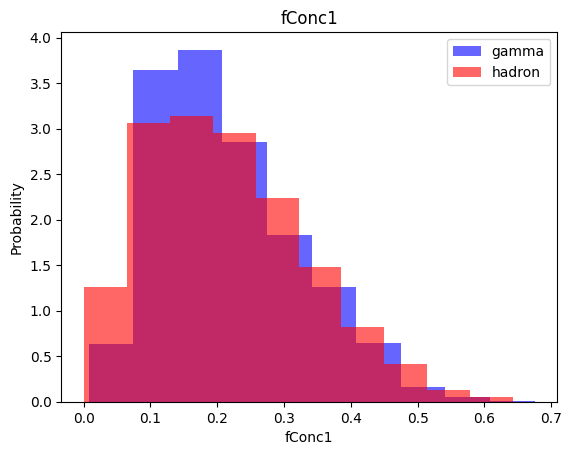

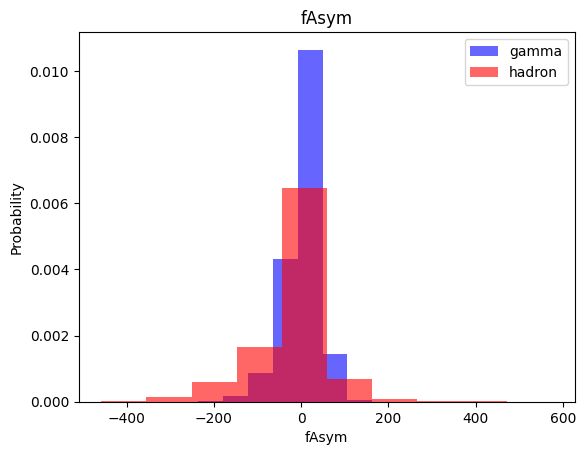

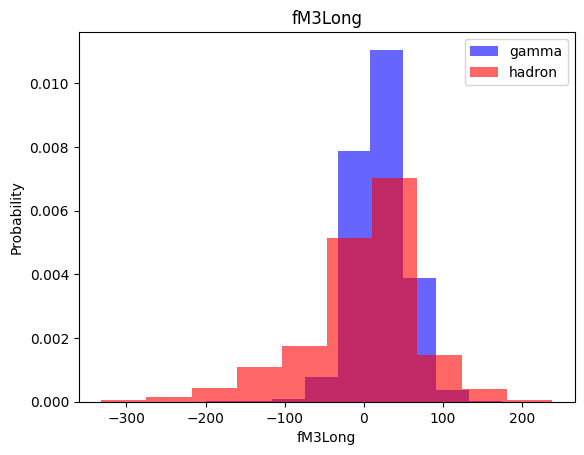

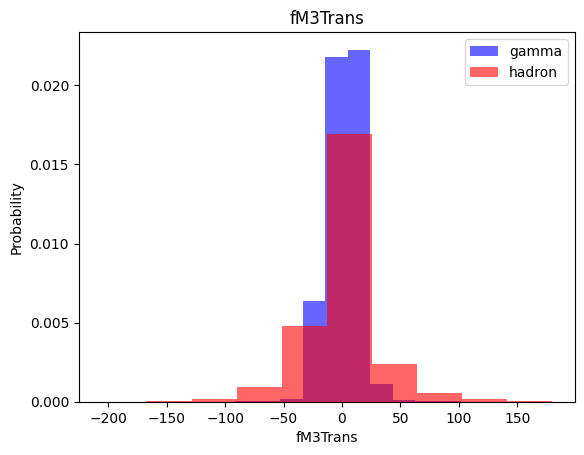

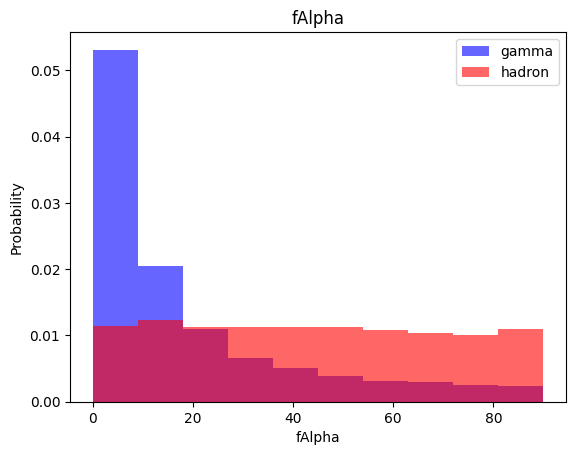

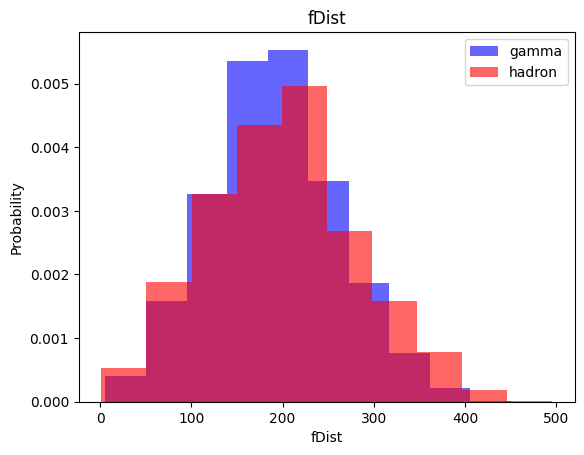

In [5]:
for label in cols[:-1]:
    plt.hist(df[df["class"] == 1][label], color="blue", label="gamma", alpha=0.6, density=True)
    plt.hist(df[df["class"] == 0][label], color="red", label="hadron", alpha=0.6, density=True)
    plt.title(label)
    plt.ylabel("Probability")
    plt.xlabel(label)
    plt.legend()
    plt.show()

Train, validation, test datasets

In [6]:
train, valid, test = np.split(df.sample(frac=1), [int(0.6*len(df)), int(0.8*len(df))])

d:\Programming\projects\AI\ml freecodecamp\virtenv\lib\site-packages\numpy\core\fromnumeric.py:59: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


In [7]:
def scale_dataset(dataframe, oversample=False):
    X = dataframe[dataframe.columns[:-1]].values
    y = dataframe[dataframe.columns[-1]].values

    scaler = StandardScaler()
    X = scaler.fit_transform(X)

    if oversample:
        ros = RandomOverSampler()
        X, y = ros.fit_resample(X,y)

    data = np.hstack((X, np.reshape(y, (-1, 1))))

    return data, X, y

In [8]:
train, X_train, y_train = scale_dataset(train, oversample=True)
valid, X_valid, y_valid = scale_dataset(valid, oversample=False)
test, X_test, y_test = scale_dataset(test, oversample=False)

k Nearest Neighbours

In [9]:
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)

KNeighborsClassifier()

In [10]:
y_pred = knn_model.predict(X_test)
print(y_pred, y_test)

[1 1 1 ... 1 1 1] [1 1 1 ... 1 1 1]


In [11]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.73      0.73      0.73      1336
           1       0.85      0.85      0.85      2468

    accuracy                           0.81      3804
   macro avg       0.79      0.79      0.79      3804
weighted avg       0.81      0.81      0.81      3804



Naive Bayes

In [12]:
nb_model = GaussianNB()
nb_model = nb_model.fit(X_train, y_train)

In [13]:
y_pred = nb_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.69      0.41      0.51      1336
           1       0.74      0.90      0.81      2468

    accuracy                           0.73      3804
   macro avg       0.71      0.65      0.66      3804
weighted avg       0.72      0.73      0.71      3804



Logistic Regression

In [14]:
lg_model = LogisticRegression()
lg_model = lg_model.fit(X_train, y_train)

In [15]:
y_pred = lg_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.68      0.72      0.70      1336
           1       0.84      0.82      0.83      2468

    accuracy                           0.78      3804
   macro avg       0.76      0.77      0.77      3804
weighted avg       0.79      0.78      0.79      3804



Support Vector Machine
SVM

In [16]:
svm_model = SVC()
svm_model = svm_model.fit(X_train, y_train)

In [17]:
y_pred = svm_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.79      0.79      1336
           1       0.89      0.89      0.89      2468

    accuracy                           0.86      3804
   macro avg       0.84      0.84      0.84      3804
weighted avg       0.86      0.86      0.86      3804



Neural networks

In [18]:
def plot_history(history):
  fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))
  ax1.plot(history.history['loss'], label='loss')
  ax1.plot(history.history['val_loss'], label='val_loss')
  ax1.set_xlabel('Epoch')
  ax1.set_ylabel('Binary crossentropy')
  ax1.grid(True)

  ax2.plot(history.history['accuracy'], label='accuracy')
  ax2.plot(history.history['val_accuracy'], label='val_accuracy')
  ax2.set_xlabel('Epoch')
  ax2.set_ylabel('Accuracy')
  ax2.grid(True)

  plt.show()

In [19]:
def train_model(X_train, y_train, num_nodes, dropout_prob, lr, batch_size, epochs):
  nn_model = tf.keras.Sequential([
      tf.keras.layers.Dense(num_nodes, activation='relu', input_shape=(10,)),
      tf.keras.layers.Dropout(dropout_prob),
      tf.keras.layers.Dense(num_nodes, activation='relu'),
      tf.keras.layers.Dropout(dropout_prob),
      tf.keras.layers.Dense(1, activation='sigmoid')
  ])

  nn_model.compile(optimizer=tf.keras.optimizers.Adam(lr), loss='binary_crossentropy',
                  metrics=['accuracy'])
  history = nn_model.fit(
    X_train, y_train, epochs=epochs, batch_size=batch_size, validation_split=0.2, verbose=0
  )

  return nn_model, history

16 nodes, dropout 0, lr 0.01, batch size 32


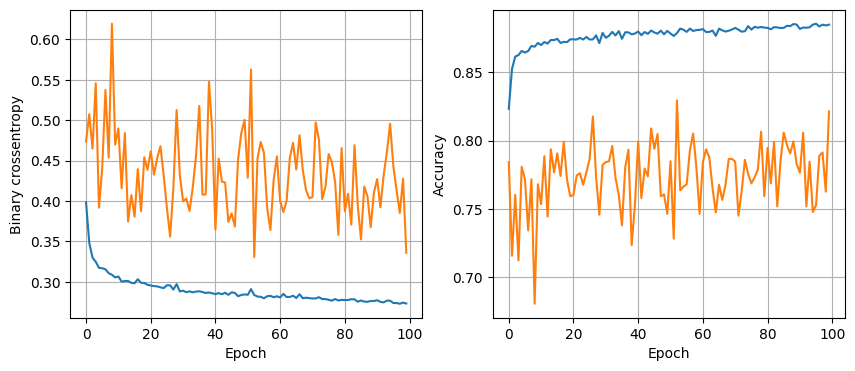

119/119 [==============================] - 0s 492us/step - loss: 0.3408 - accuracy: 0.8638
16 nodes, dropout 0, lr 0.01, batch size 64


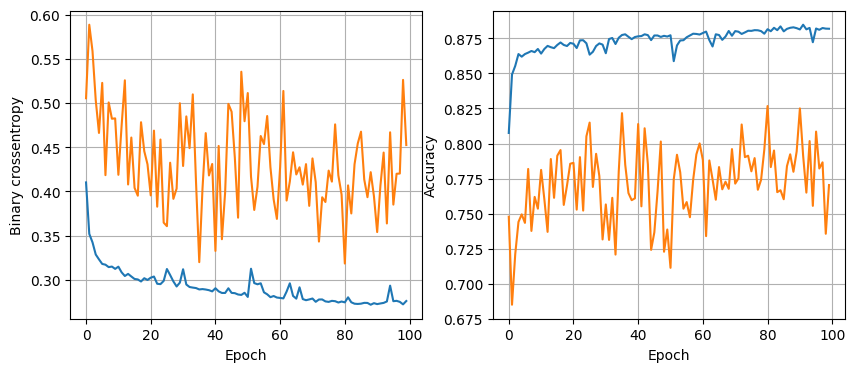

119/119 [==============================] - 0s 525us/step - loss: 0.3576 - accuracy: 0.8612
16 nodes, dropout 0, lr 0.01, batch size 128


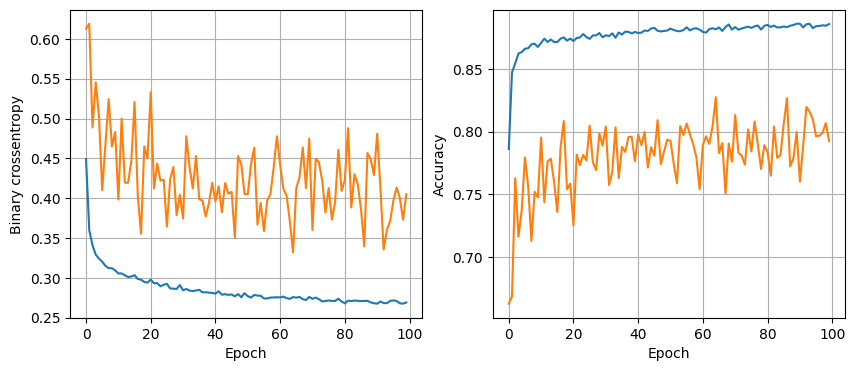

119/119 [==============================] - 0s 602us/step - loss: 0.3310 - accuracy: 0.8683
16 nodes, dropout 0, lr 0.005, batch size 32


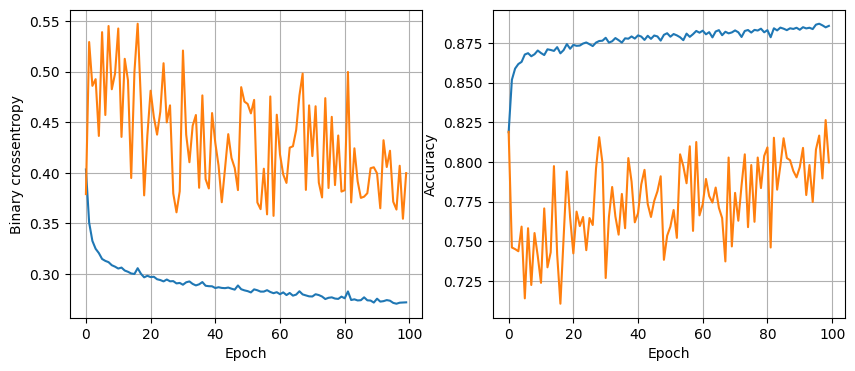

119/119 [==============================] - 0s 492us/step - loss: 0.3244 - accuracy: 0.8644
16 nodes, dropout 0, lr 0.005, batch size 64


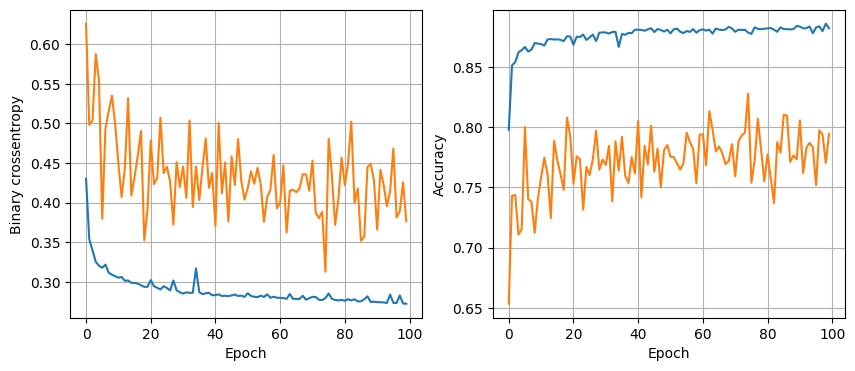

119/119 [==============================] - 0s 517us/step - loss: 0.3385 - accuracy: 0.8594
16 nodes, dropout 0, lr 0.005, batch size 128


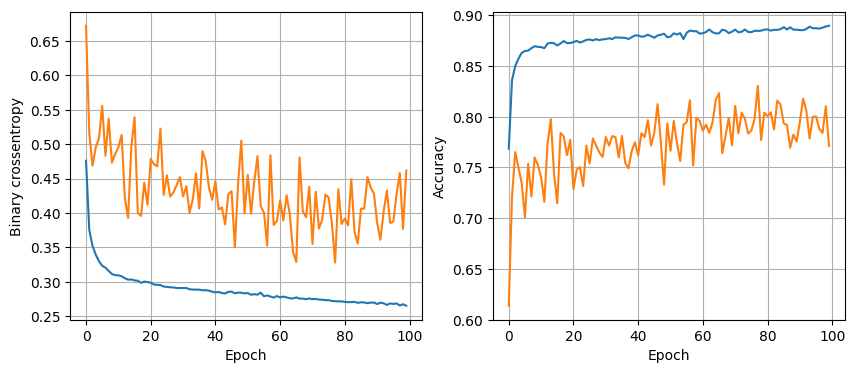

119/119 [==============================] - 0s 559us/step - loss: 0.3235 - accuracy: 0.8749
16 nodes, dropout 0, lr 0.001, batch size 32


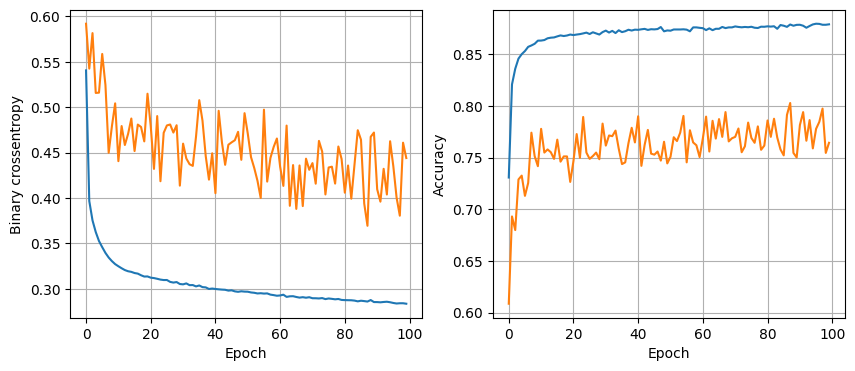

119/119 [==============================] - 0s 517us/step - loss: 0.3224 - accuracy: 0.8701
16 nodes, dropout 0, lr 0.001, batch size 64


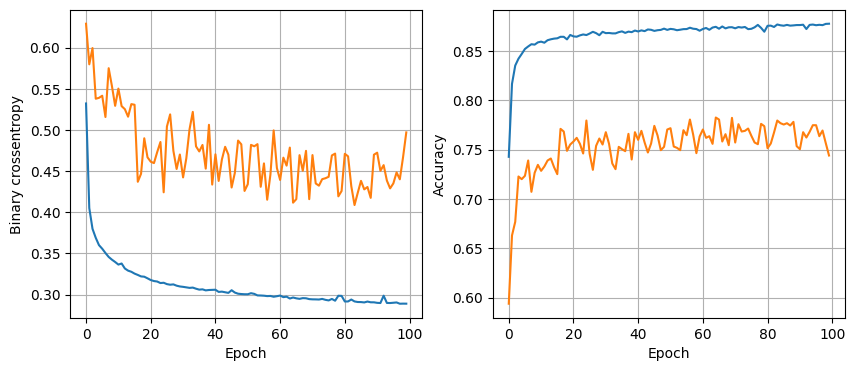

119/119 [==============================] - 0s 527us/step - loss: 0.3227 - accuracy: 0.8709
16 nodes, dropout 0, lr 0.001, batch size 128


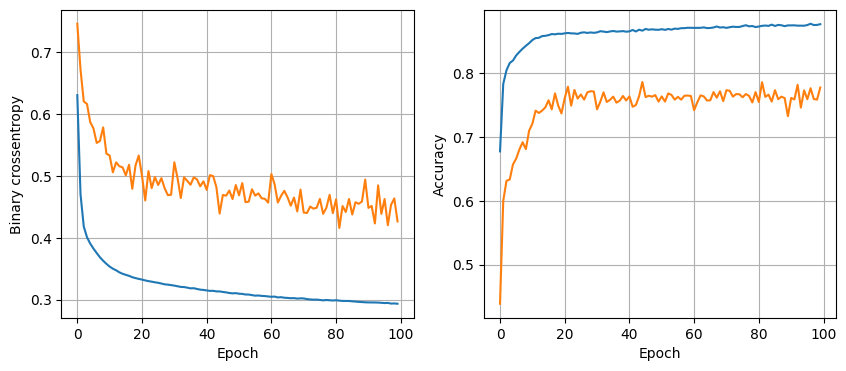

119/119 [==============================] - 0s 627us/step - loss: 0.3288 - accuracy: 0.8657
16 nodes, dropout 0.2, lr 0.01, batch size 32


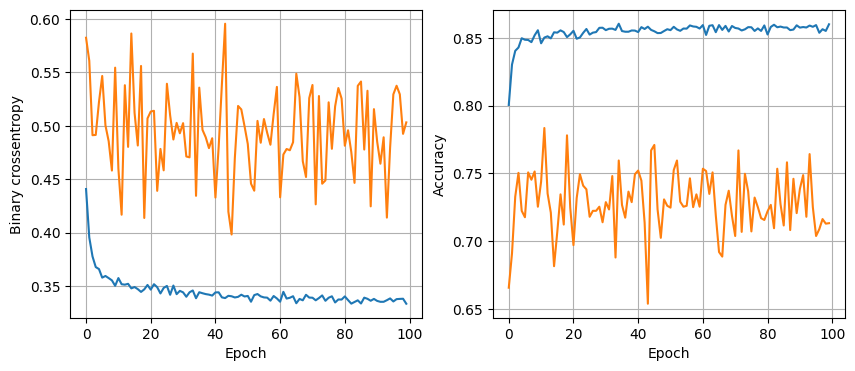

119/119 [==============================] - 0s 525us/step - loss: 0.3329 - accuracy: 0.8623
16 nodes, dropout 0.2, lr 0.01, batch size 64


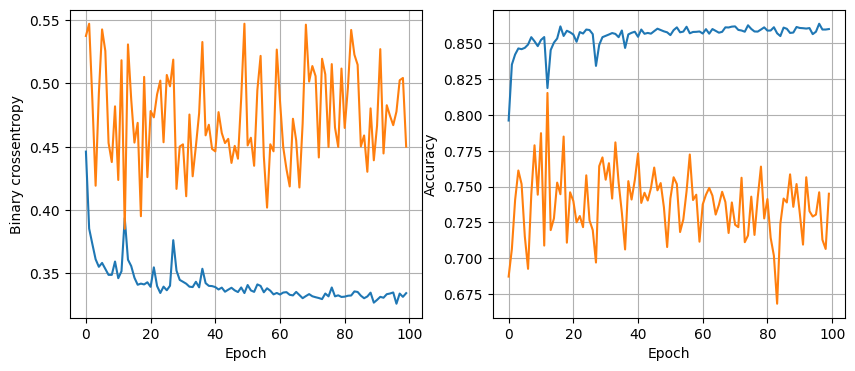

119/119 [==============================] - 0s 568us/step - loss: 0.3239 - accuracy: 0.8651
16 nodes, dropout 0.2, lr 0.01, batch size 128


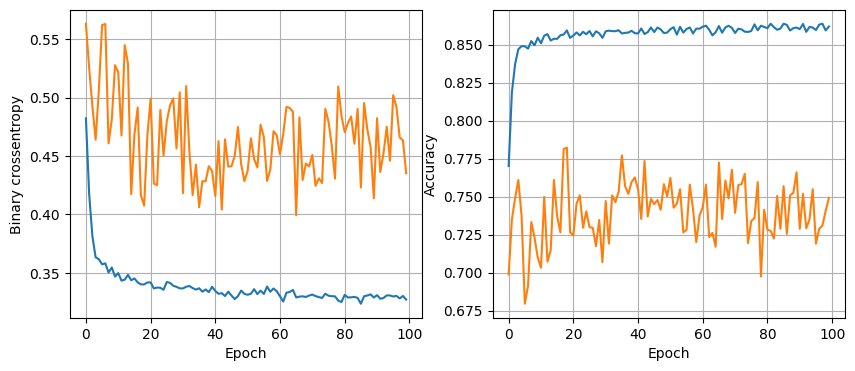

119/119 [==============================] - 0s 534us/step - loss: 0.3239 - accuracy: 0.8644
16 nodes, dropout 0.2, lr 0.005, batch size 32


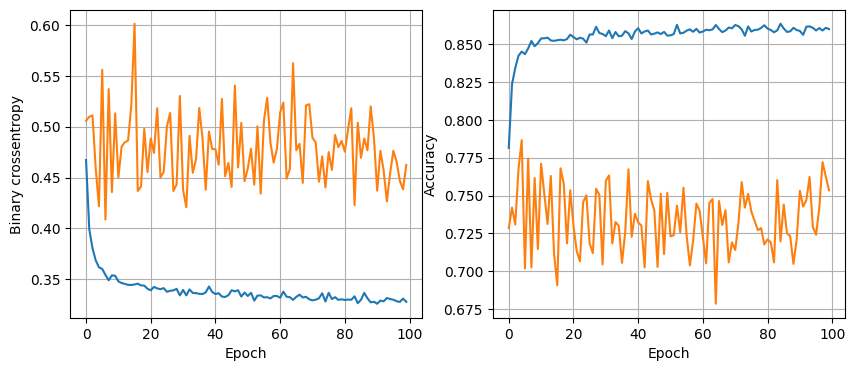

119/119 [==============================] - 0s 525us/step - loss: 0.3218 - accuracy: 0.8646
16 nodes, dropout 0.2, lr 0.005, batch size 64


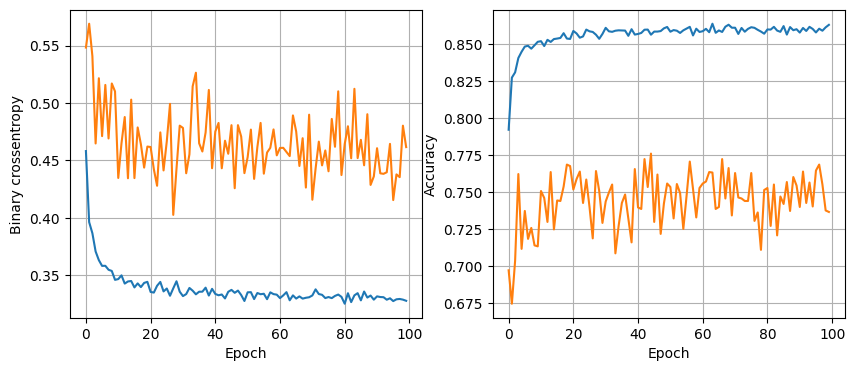

119/119 [==============================] - 0s 558us/step - loss: 0.3262 - accuracy: 0.8654
16 nodes, dropout 0.2, lr 0.005, batch size 128


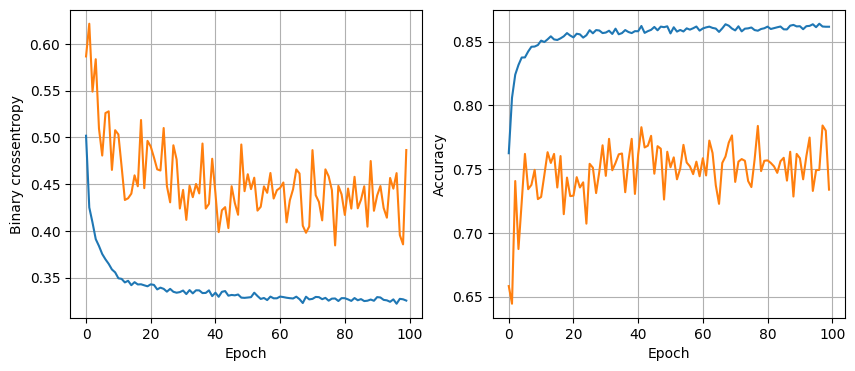

119/119 [==============================] - 0s 542us/step - loss: 0.3234 - accuracy: 0.8662
16 nodes, dropout 0.2, lr 0.001, batch size 32


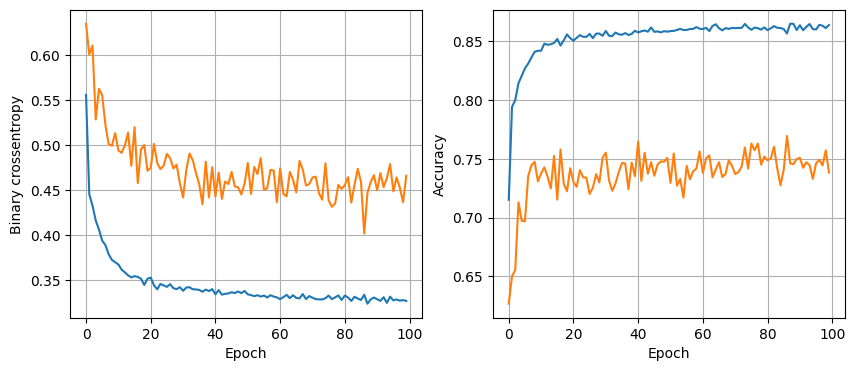

119/119 [==============================] - 0s 559us/step - loss: 0.3291 - accuracy: 0.8678
16 nodes, dropout 0.2, lr 0.001, batch size 64


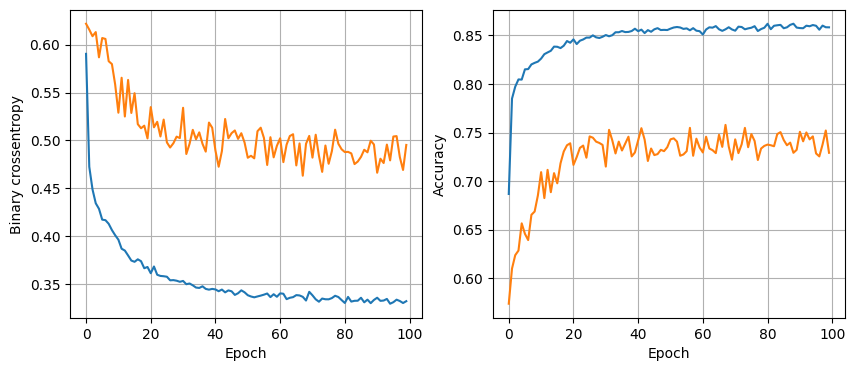

119/119 [==============================] - 0s 669us/step - loss: 0.3258 - accuracy: 0.8636
16 nodes, dropout 0.2, lr 0.001, batch size 128


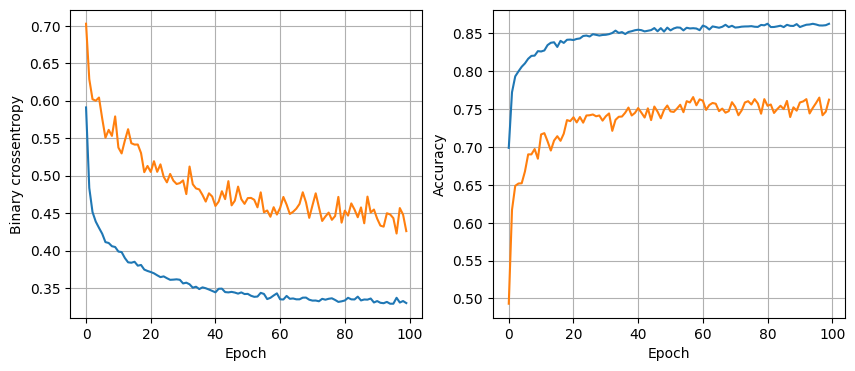

119/119 [==============================] - 0s 525us/step - loss: 0.3281 - accuracy: 0.8649
32 nodes, dropout 0, lr 0.01, batch size 32


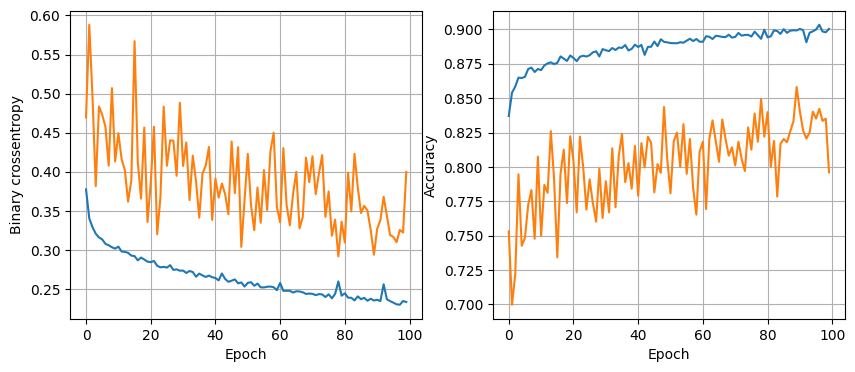

119/119 [==============================] - 0s 517us/step - loss: 0.4222 - accuracy: 0.8667
32 nodes, dropout 0, lr 0.01, batch size 64


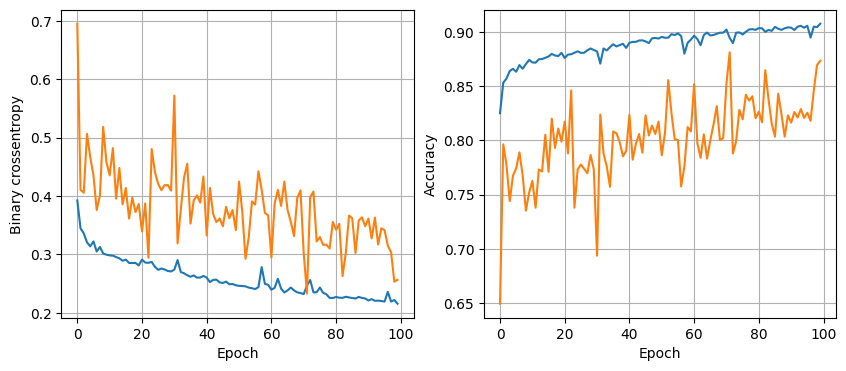

119/119 [==============================] - 0s 576us/step - loss: 0.4596 - accuracy: 0.8488
32 nodes, dropout 0, lr 0.01, batch size 128


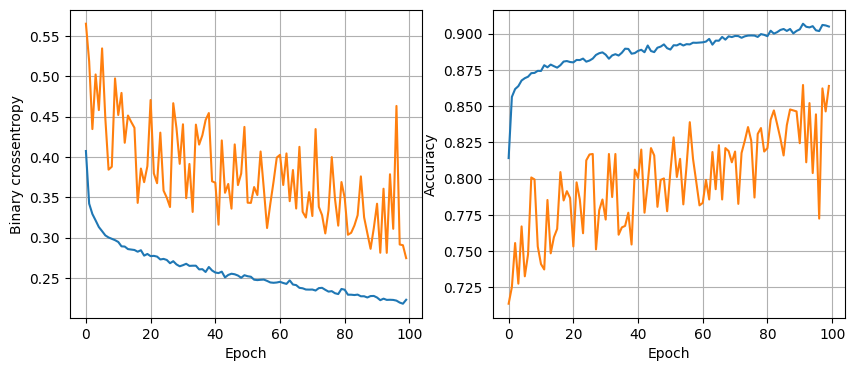

119/119 [==============================] - 0s 551us/step - loss: 0.4035 - accuracy: 0.8562
32 nodes, dropout 0, lr 0.005, batch size 32


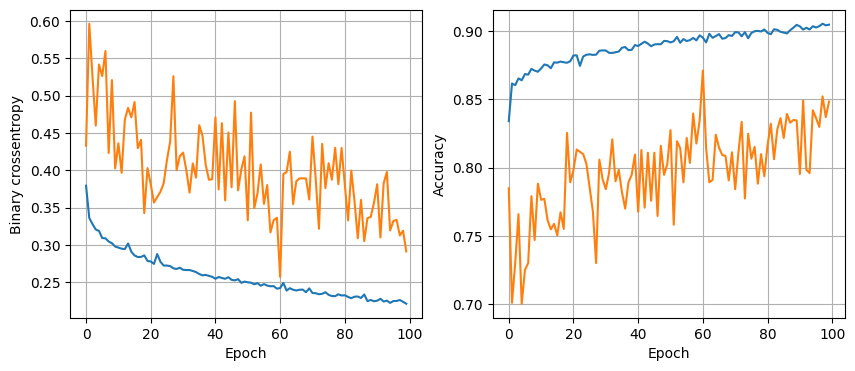

119/119 [==============================] - 0s 627us/step - loss: 0.4089 - accuracy: 0.8594
32 nodes, dropout 0, lr 0.005, batch size 64


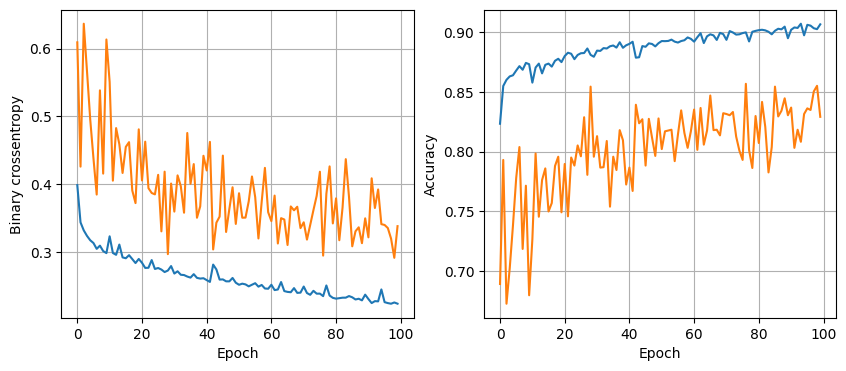

119/119 [==============================] - 0s 466us/step - loss: 0.3746 - accuracy: 0.8633
32 nodes, dropout 0, lr 0.005, batch size 128


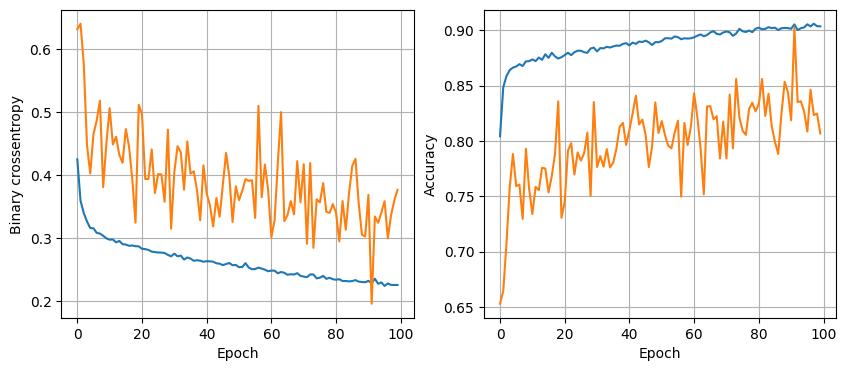

119/119 [==============================] - 0s 596us/step - loss: 0.3698 - accuracy: 0.8609
32 nodes, dropout 0, lr 0.001, batch size 32


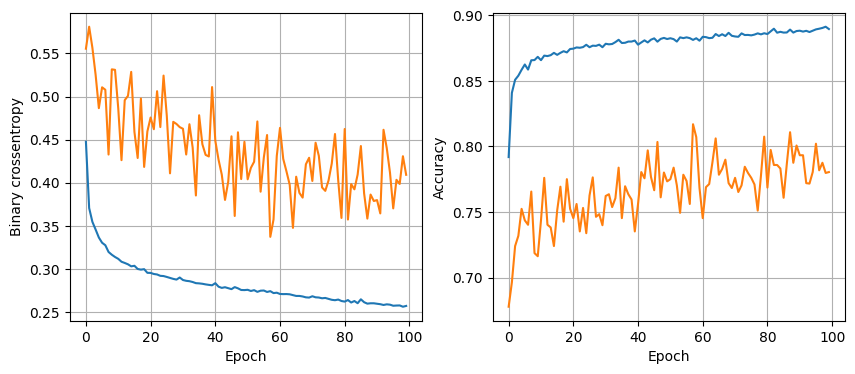

119/119 [==============================] - 0s 594us/step - loss: 0.3397 - accuracy: 0.8641
32 nodes, dropout 0, lr 0.001, batch size 64


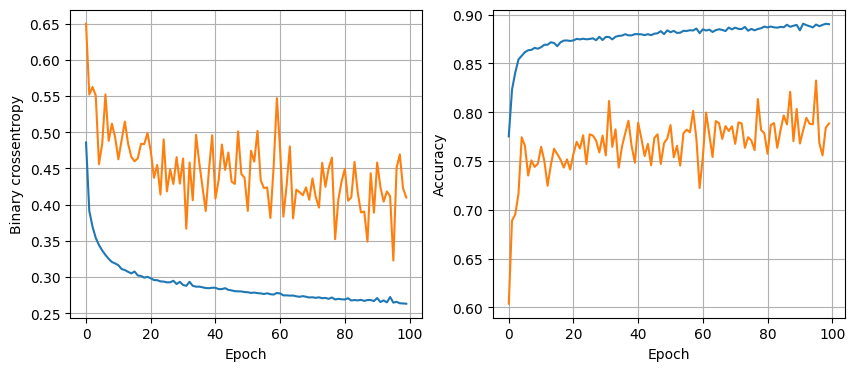

119/119 [==============================] - 0s 585us/step - loss: 0.3294 - accuracy: 0.8696
32 nodes, dropout 0, lr 0.001, batch size 128


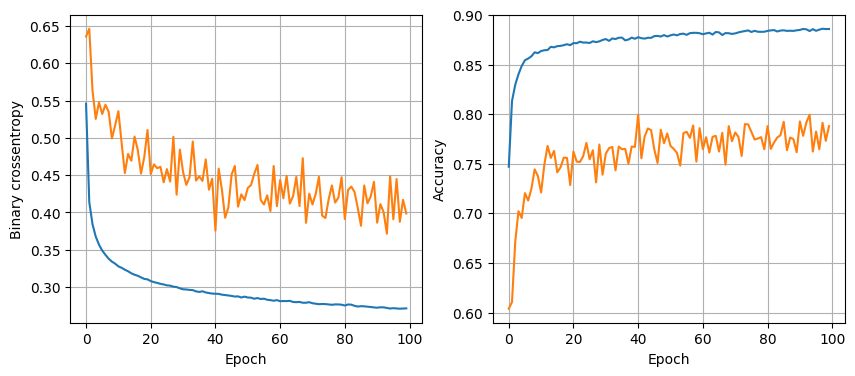

119/119 [==============================] - 0s 517us/step - loss: 0.3182 - accuracy: 0.8696
32 nodes, dropout 0.2, lr 0.01, batch size 32


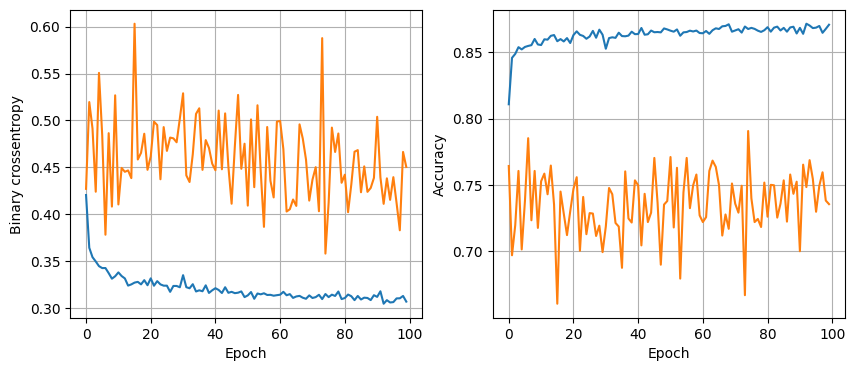

119/119 [==============================] - 0s 576us/step - loss: 0.3249 - accuracy: 0.8678
32 nodes, dropout 0.2, lr 0.01, batch size 64


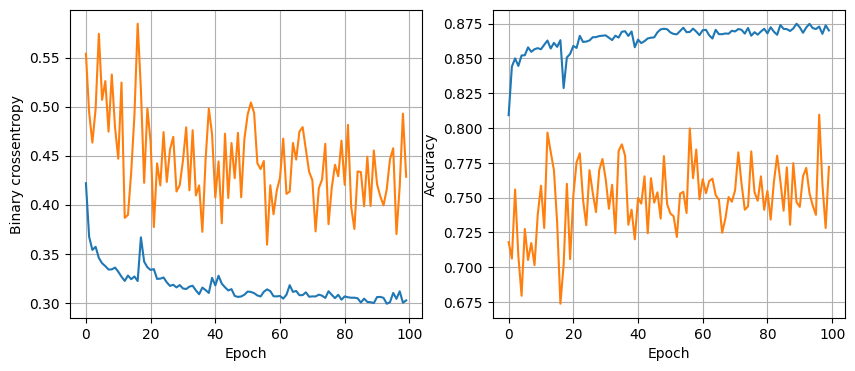

119/119 [==============================] - 0s 593us/step - loss: 0.3269 - accuracy: 0.8691
32 nodes, dropout 0.2, lr 0.01, batch size 128


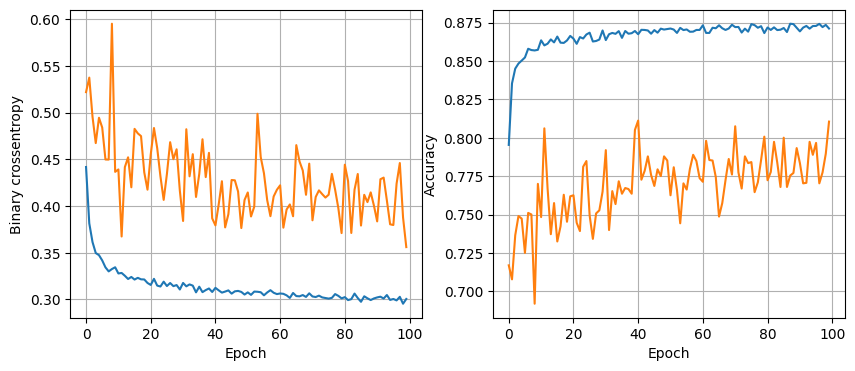

119/119 [==============================] - 0s 669us/step - loss: 0.3225 - accuracy: 0.8644
32 nodes, dropout 0.2, lr 0.005, batch size 32


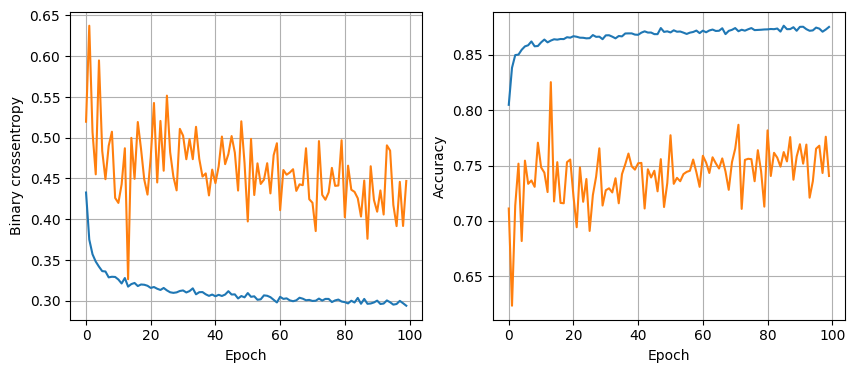

119/119 [==============================] - 0s 551us/step - loss: 0.3288 - accuracy: 0.8691
32 nodes, dropout 0.2, lr 0.005, batch size 64


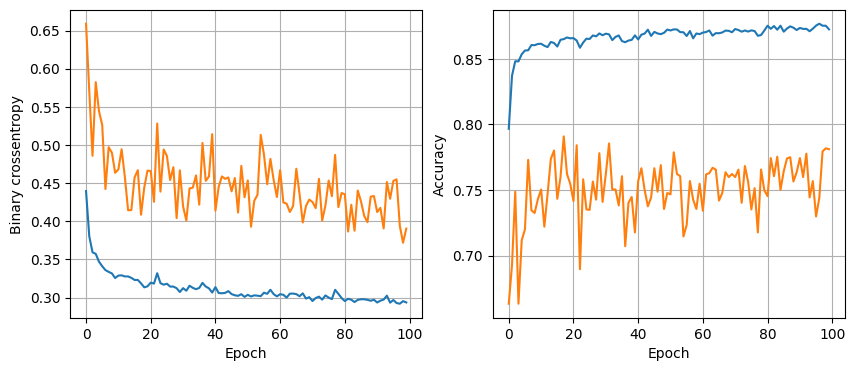

119/119 [==============================] - 0s 585us/step - loss: 0.3188 - accuracy: 0.8699
32 nodes, dropout 0.2, lr 0.005, batch size 128


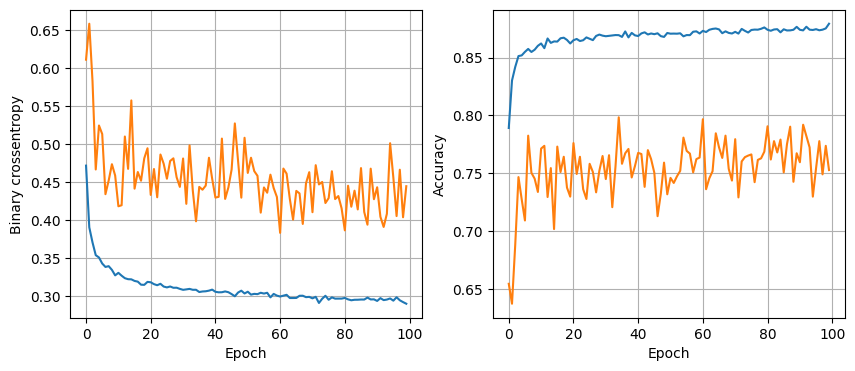

119/119 [==============================] - 0s 612us/step - loss: 0.3158 - accuracy: 0.8683
32 nodes, dropout 0.2, lr 0.001, batch size 32


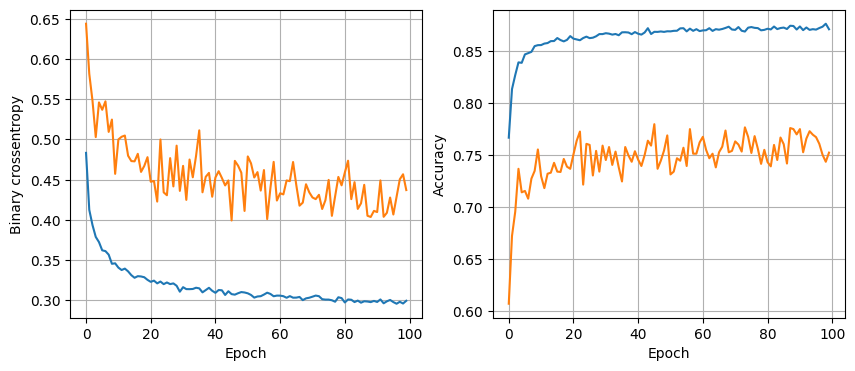

119/119 [==============================] - 0s 602us/step - loss: 0.3172 - accuracy: 0.8741
32 nodes, dropout 0.2, lr 0.001, batch size 64


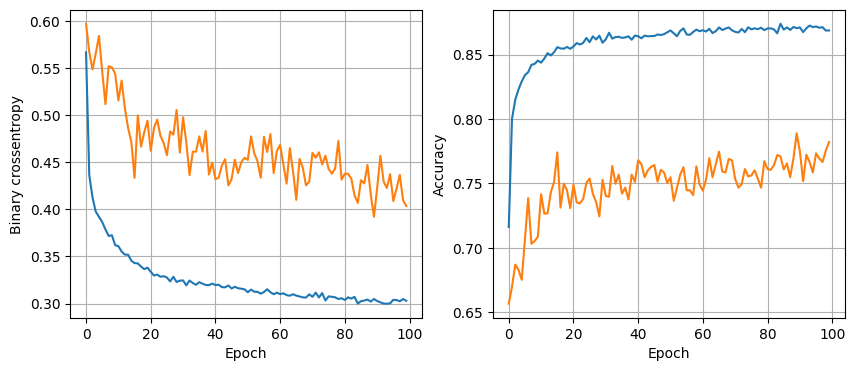

119/119 [==============================] - 0s 605us/step - loss: 0.3181 - accuracy: 0.8696
32 nodes, dropout 0.2, lr 0.001, batch size 128


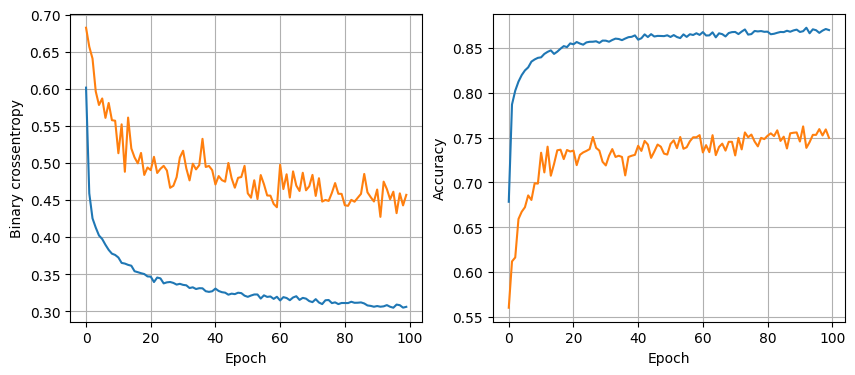

119/119 [==============================] - 0s 551us/step - loss: 0.3142 - accuracy: 0.8709
64 nodes, dropout 0, lr 0.01, batch size 32


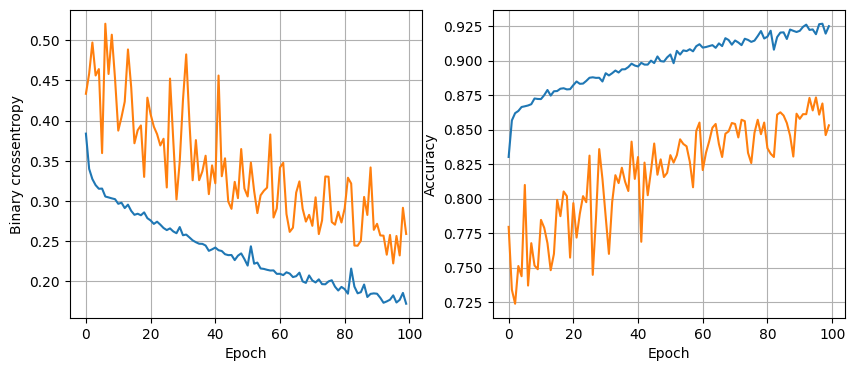

119/119 [==============================] - 0s 551us/step - loss: 0.6167 - accuracy: 0.8559
64 nodes, dropout 0, lr 0.01, batch size 64


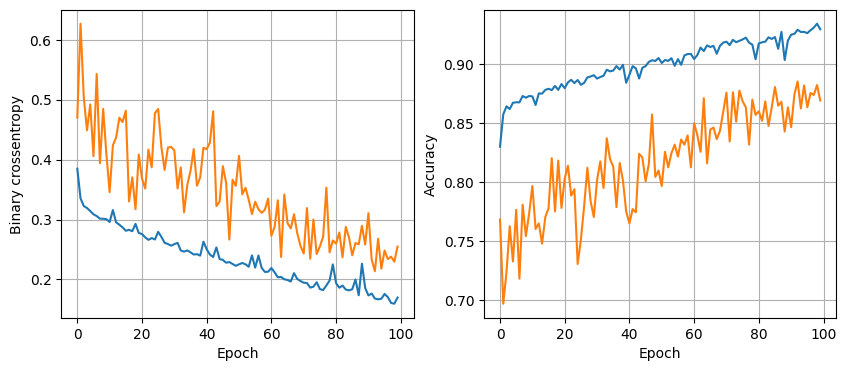

119/119 [==============================] - 0s 542us/step - loss: 0.6242 - accuracy: 0.8591
64 nodes, dropout 0, lr 0.01, batch size 128


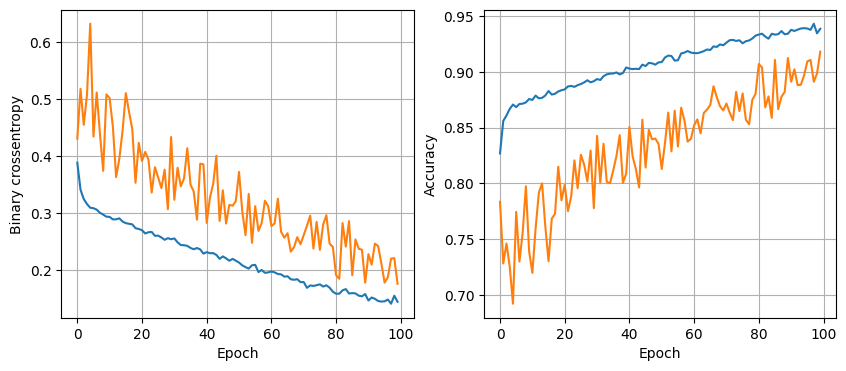

119/119 [==============================] - 0s 534us/step - loss: 0.6619 - accuracy: 0.8436
64 nodes, dropout 0, lr 0.005, batch size 32


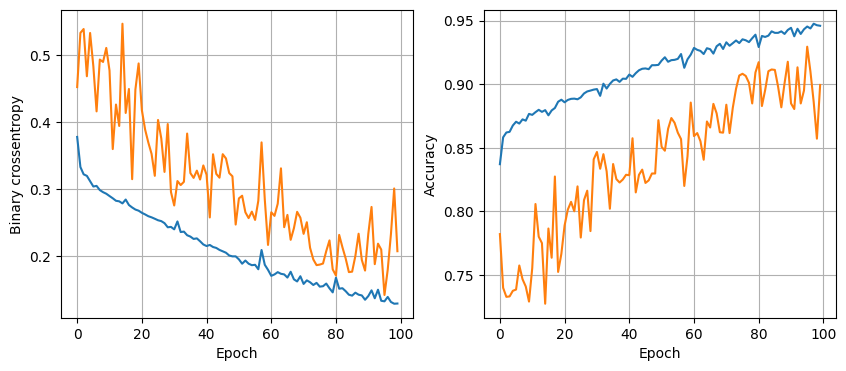

119/119 [==============================] - 0s 551us/step - loss: 0.7178 - accuracy: 0.8512
64 nodes, dropout 0, lr 0.005, batch size 64


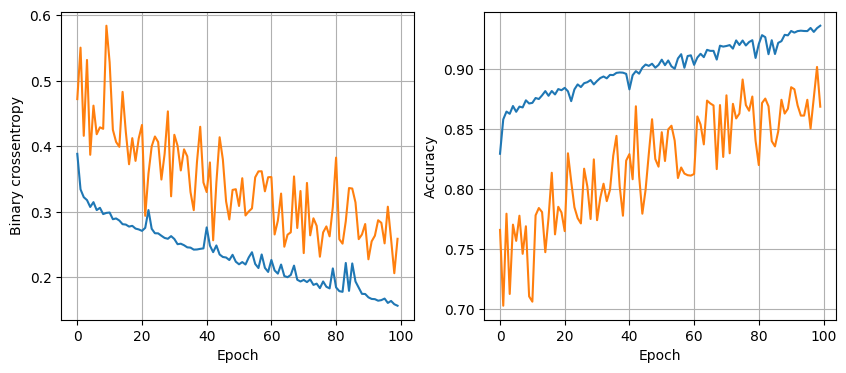

119/119 [==============================] - 0s 534us/step - loss: 0.5208 - accuracy: 0.8601
64 nodes, dropout 0, lr 0.005, batch size 128


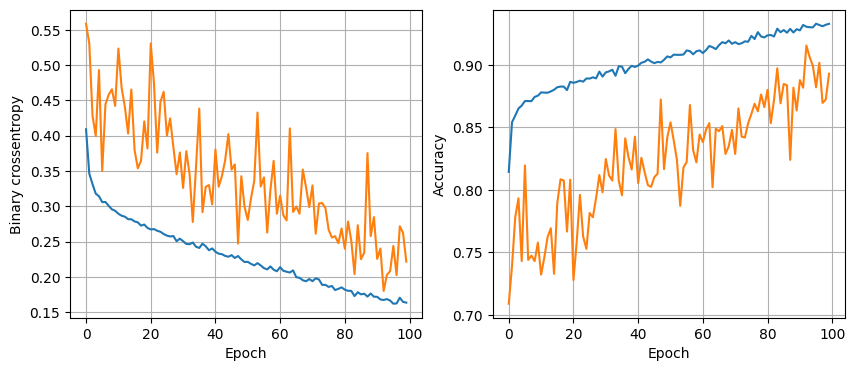

119/119 [==============================] - 0s 593us/step - loss: 0.4808 - accuracy: 0.8538
64 nodes, dropout 0, lr 0.001, batch size 32


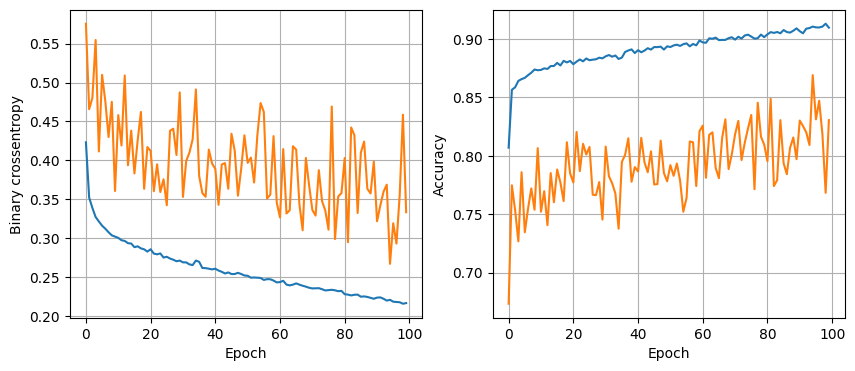

119/119 [==============================] - 0s 576us/step - loss: 0.3620 - accuracy: 0.8662
64 nodes, dropout 0, lr 0.001, batch size 64


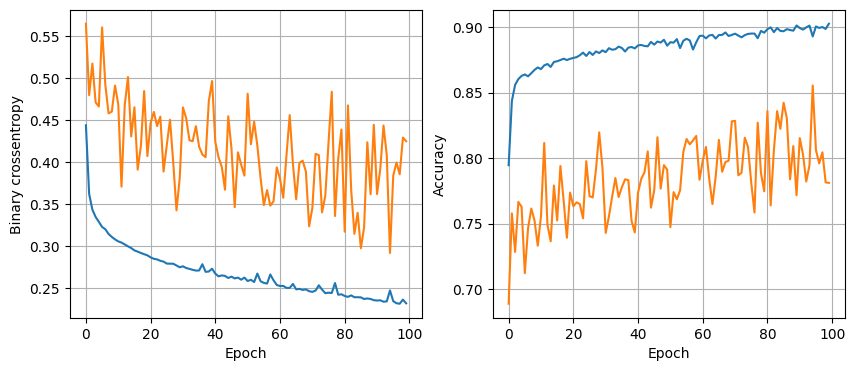

119/119 [==============================] - 0s 508us/step - loss: 0.3526 - accuracy: 0.8654
64 nodes, dropout 0, lr 0.001, batch size 128


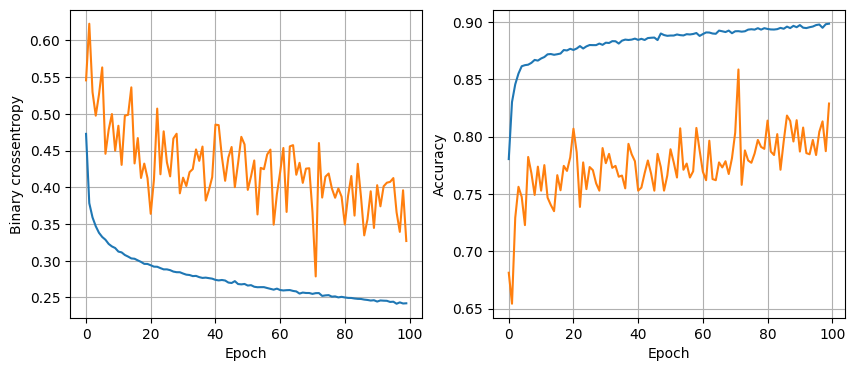

119/119 [==============================] - 0s 508us/step - loss: 0.3422 - accuracy: 0.8636
64 nodes, dropout 0.2, lr 0.01, batch size 32


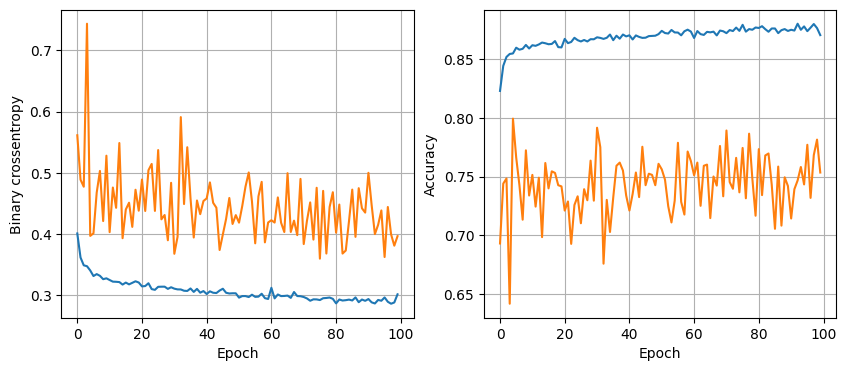

119/119 [==============================] - 0s 551us/step - loss: 0.3381 - accuracy: 0.8607
64 nodes, dropout 0.2, lr 0.01, batch size 64


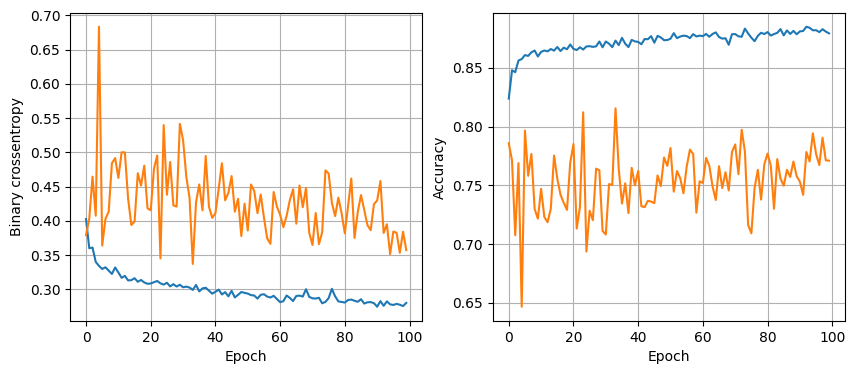

119/119 [==============================] - 0s 559us/step - loss: 0.3353 - accuracy: 0.8683
64 nodes, dropout 0.2, lr 0.01, batch size 128


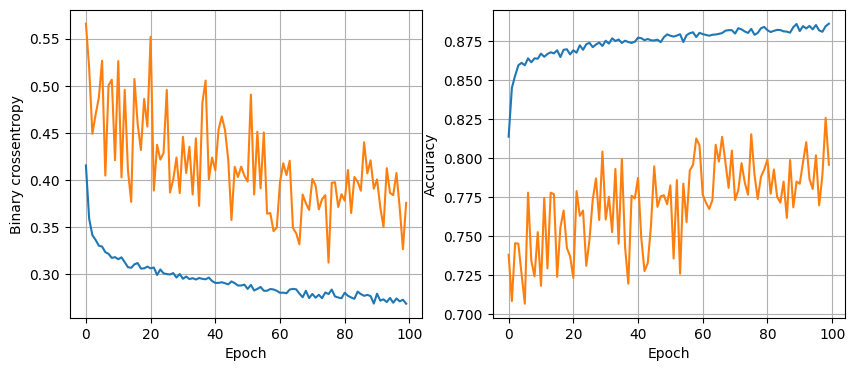

119/119 [==============================] - 0s 542us/step - loss: 0.3306 - accuracy: 0.8696
64 nodes, dropout 0.2, lr 0.005, batch size 32


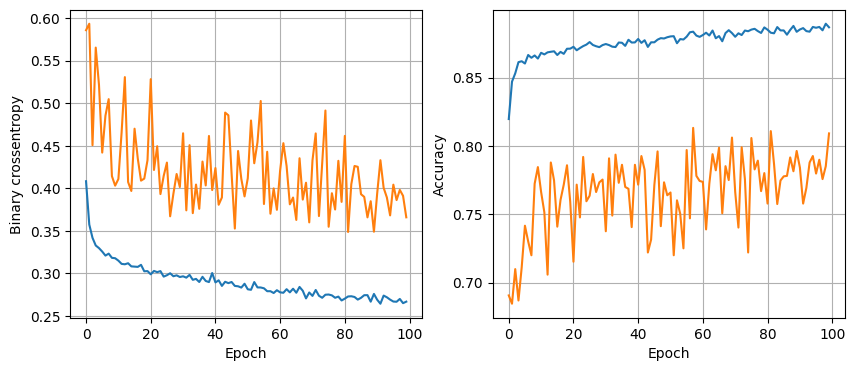

119/119 [==============================] - 0s 517us/step - loss: 0.3288 - accuracy: 0.8717
64 nodes, dropout 0.2, lr 0.005, batch size 64


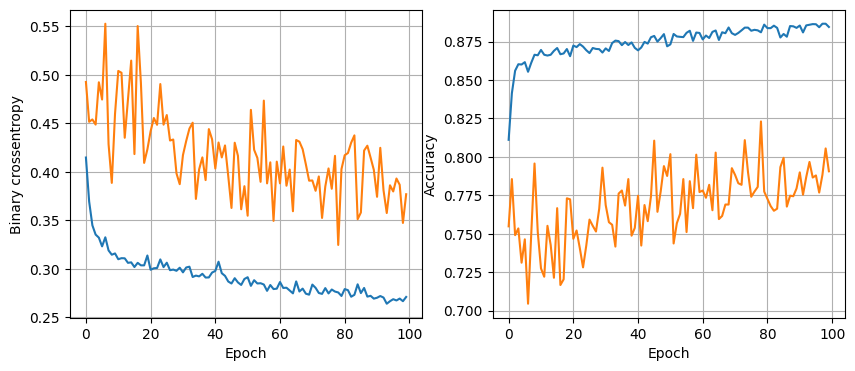

119/119 [==============================] - 0s 627us/step - loss: 0.3283 - accuracy: 0.8715
64 nodes, dropout 0.2, lr 0.005, batch size 128


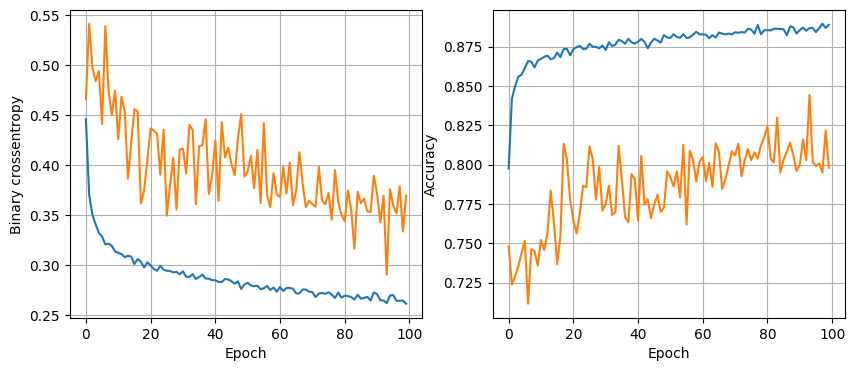

119/119 [==============================] - 0s 483us/step - loss: 0.3303 - accuracy: 0.8709
64 nodes, dropout 0.2, lr 0.001, batch size 32


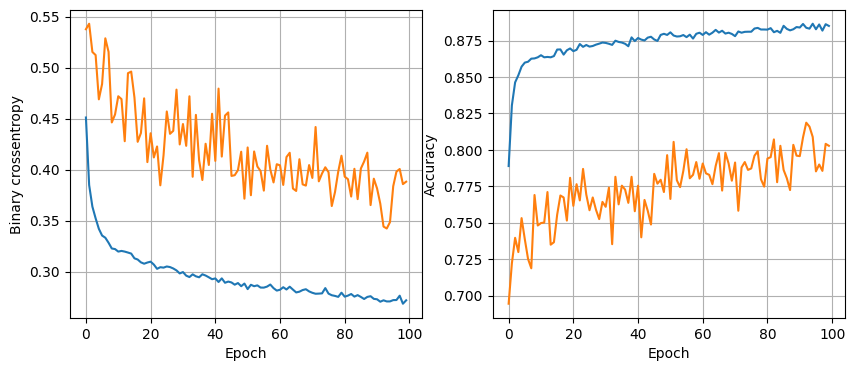

119/119 [==============================] - 0s 636us/step - loss: 0.3175 - accuracy: 0.8715
64 nodes, dropout 0.2, lr 0.001, batch size 64


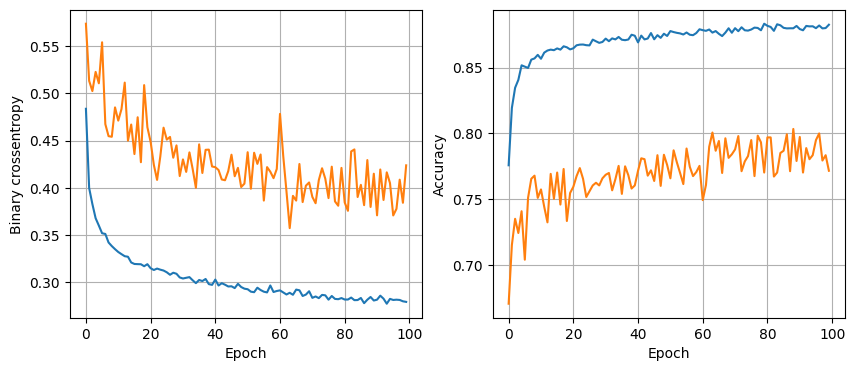

119/119 [==============================] - 0s 568us/step - loss: 0.3134 - accuracy: 0.8725
64 nodes, dropout 0.2, lr 0.001, batch size 128


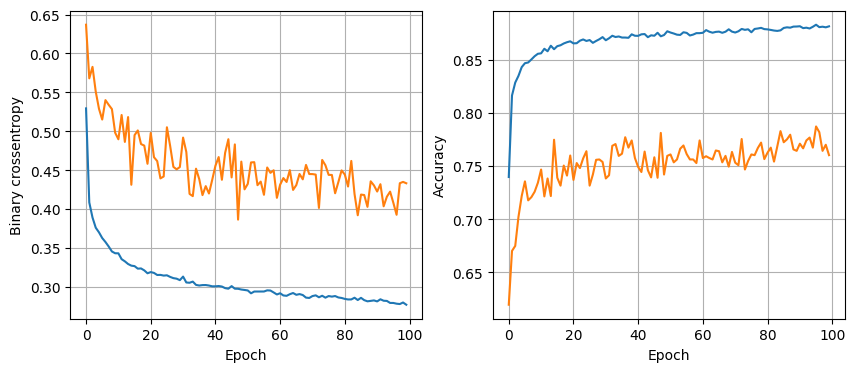

119/119 [==============================] - 0s 534us/step - loss: 0.3144 - accuracy: 0.8772


In [20]:
least_val_loss = float('inf')
least_loss_model = None
epochs=100
for num_nodes in [16, 32, 64]:
  for dropout_prob in[0, 0.2]:
    for lr in [0.01, 0.005, 0.001]:
      for batch_size in [32, 64, 128]:
        print(f"{num_nodes} nodes, dropout {dropout_prob}, lr {lr}, batch size {batch_size}")
        model, history = train_model(X_train, y_train, num_nodes, dropout_prob, lr, batch_size, epochs)
        plot_history(history)
        val_loss = model.evaluate(X_valid, y_valid)[0]
        if val_loss < least_val_loss:
          least_val_loss = val_loss
          least_loss_model = model

In [21]:
y_pred = least_loss_model.predict(X_test)
y_pred = (y_pred > 0.5).astype(int).reshape(-1,)

119/119 [==============================] - 0s 373us/step


In [22]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.75      0.80      1336
           1       0.87      0.94      0.91      2468

    accuracy                           0.87      3804
   macro avg       0.87      0.84      0.85      3804
weighted avg       0.87      0.87      0.87      3804

